# RandomForest 

In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

In [71]:
df = pd.read_csv('data/one-hot_genres.csv', index_col='id')
mov = pd.read_csv('../data/popular_10000_movies/movies_dataset.csv', index_col='id')

In [3]:
df.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,
385687,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
697843,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
603692,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
569094,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
502356,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [4]:
mov.head()

,genre_ids,original_language,overview,popularity,release_date,title,vote_average,vote_count,genres
id,,,,,,,,,
385687,"[28, 80, 53]",en,Over many missions and against impossible odds...,4654.279,2023-05-17,Fast X,7.3,2093,"Action, Crime, Thriller"
697843,"[28, 53]",en,Tasked with extracting a family who is at the ...,2494.010,2023-06-09,Extraction 2,7.7,910,"Action, Thriller"
603692,"[28, 53, 80]",en,"With the price on his head ever increasing, Jo...",1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime"
569094,"[28, 12, 16, 878]",en,"After reuniting with Gwen Stacy, Brooklyn’s fu...",2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction"
502356,"[16, 10751, 12, 14, 35]",en,"While working underground to fix a water main,...",1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy"


In [5]:
mov = mov[['vote_average', 'popularity']]

In [6]:
mov.isna().sum()

vote_average    0
popularity      0
dtype: int64

In [7]:
mov = mov[mov['vote_average']>0]

In [8]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9859 entries, 385687 to 465109
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vote_average  9859 non-null   float64
 1   popularity    9859 non-null   float64
dtypes: float64(2)
memory usage: 231.1 KB


In [9]:
result = pd.merge(df, mov, on='id', how='inner')

In [10]:
result.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,vote_average,popularity
id,,,,,,,,,,,,,,,,,,,,,
385687,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,7.3,4654.279
697843,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,7.7,2494.010
603692,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,7.9,1920.127
569094,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,8.6,2013.795
502356,0,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,7.8,1539.037


In [11]:
result.drop_duplicates(inplace=True)

In [13]:
X = result.drop('vote_average', axis=1)
y = result['vote_average']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [95]:
X_train.shape

(7848, 20)

In [86]:
RFreg = RandomForestRegressor()

In [97]:
n_estimators = [int(x) for x in np.linspace(100, 1000, 10)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [88]:
n_estimators = [int(x) for x in np.linspace(100, 1000, 10)]
max_features = ['auto','sqrt']
max_depth =  [int(x) for x in np.linspace(5, 30, 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [89]:
rf_cv = RandomizedSearchCV(estimator=RFreg, param_distributions=random_grid, scoring='neg_mean_squared_error', 
                           verbose=2, random_state=42, n_jobs=-1)

In [101]:
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [110]:
rf_cv.score(X_test, y_test)

-0.5509726967831509

In [122]:
1 - ((((y_test-predictions)**2).sum()) / (((y_test-y_test.mean())**2).sum()))

0.2641668703724329

In [102]:
predictions = rf_cv.predict(X_test)

f:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vote_average', ylabel='Density'>

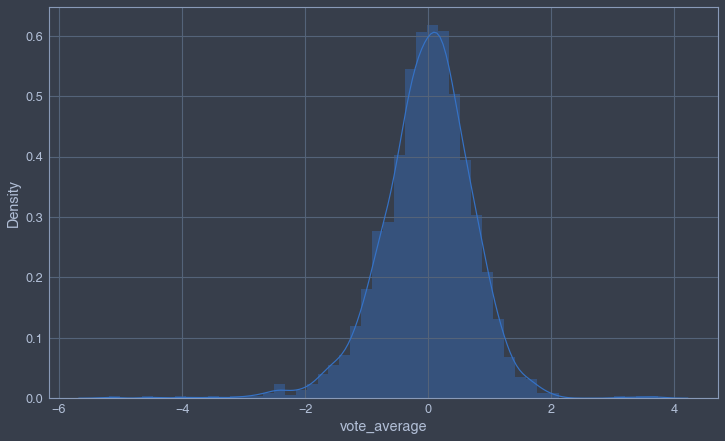

In [103]:
sns.distplot(y_test-predictions)

Text(0.5, 0, 'real Vote')

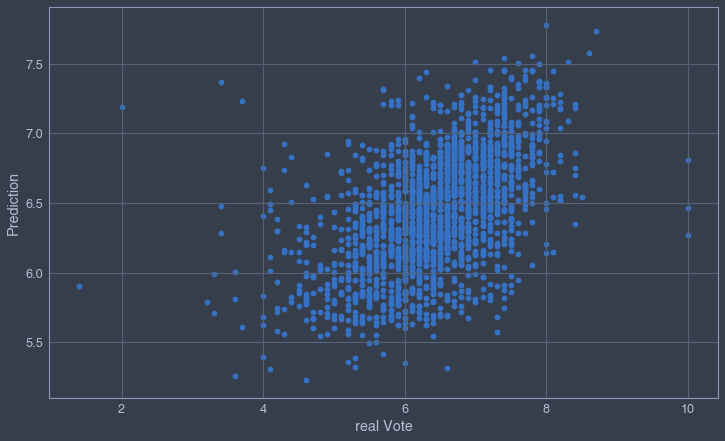

In [108]:
plt.scatter(y_test, predictions)
plt.ylabel('Prediction')
plt.xlabel('real Vote')

In [117]:
X_test.iloc[10]

Action              0.000
Adventure           0.000
Animation           0.000
Comedy              0.000
Crime               0.000
Documentary         0.000
Drama               1.000
Family              0.000
Fantasy             0.000
History             0.000
Horror              0.000
Music               0.000
Mystery             0.000
Romance             0.000
Science Fiction     0.000
TV Movie            0.000
Thriller            0.000
War                 0.000
Western             0.000
popularity         11.585
Name: 1944, dtype: float64

In [118]:
predictions[10]

6.782839700561237

In [119]:
y_test.iloc[10]

6.1

(4.226206596080515, 8.78193680703343)

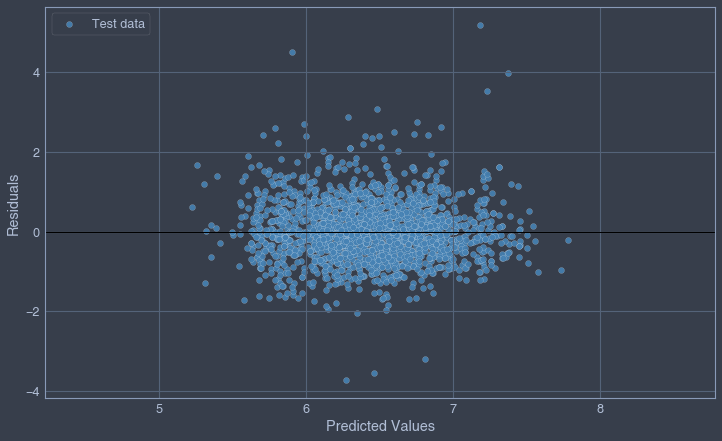

In [124]:
plt.scatter(predictions, predictions-y_test, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9, label="Test data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=predictions.min()-2, xmax=predictions.max()+5, lw=1, color='black')
plt.xlim([predictions.min()-1, predictions.max()+1])

## Another try

Projecting 20-dimensional data to 2D


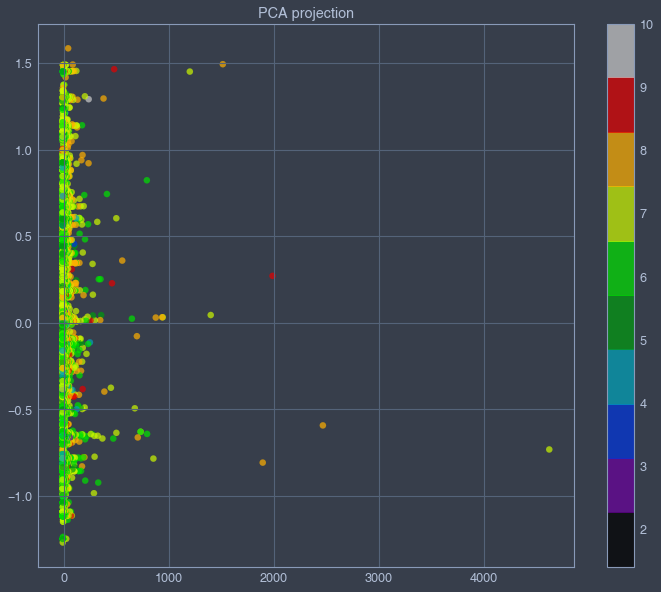

In [21]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print(f'Projecting {X.shape[1]}-dimensional data to 2D')

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=0.7, s=40,
           cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('PCA projection');

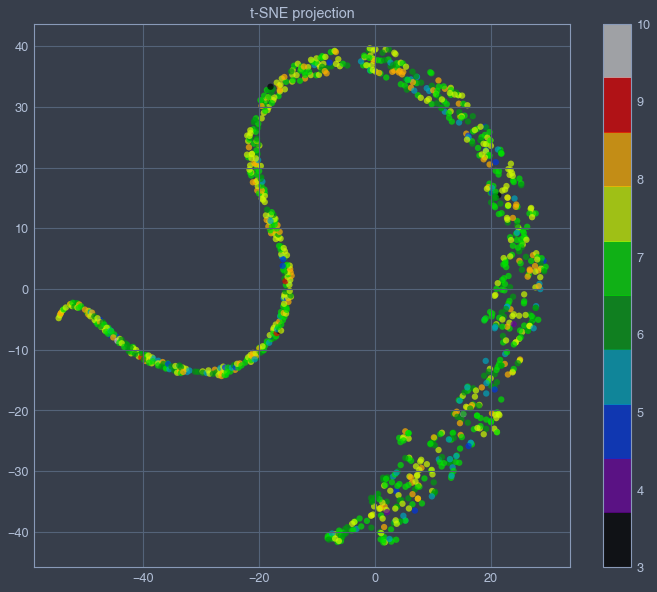

In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X[:1000])

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y[:1000], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('t-SNE projection');

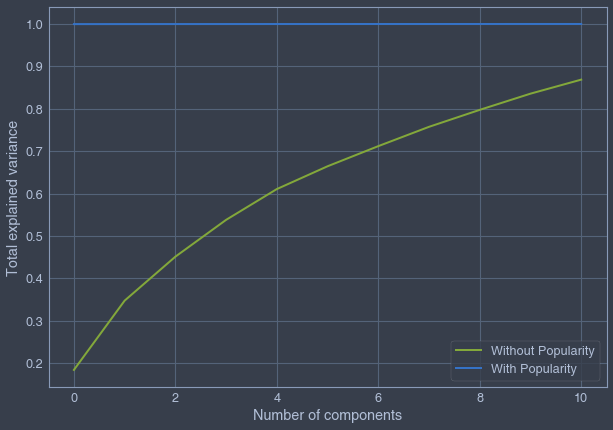

In [68]:
wo_pop = PCA(n_components=11)
wo_pop.fit_transform(X.drop('popularity', axis=1))

w_pop = PCA(n_components=11)
w_pop.fit_transform(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(wo_pop.explained_variance_ratio_), color='g', lw=2, label='Without Popularity')
plt.plot(np.cumsum(w_pop.explained_variance_ratio_), color='b', lw=2, label='With Popularity')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.legend()

## Add vote count for data

In [73]:
mov = mov[['vote_count', 'vote_average', 'popularity']]
mov = mov[mov['vote_average']>0]

result = pd.merge(df, mov, on='id', how='inner')
result.drop_duplicates(inplace=True)

In [77]:
X = result.drop('vote_average', axis=1)
y = result['vote_average']

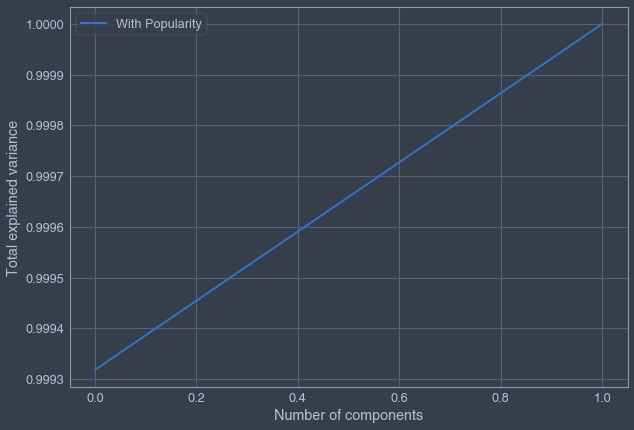

In [81]:
w_pop = PCA(n_components=2)
w_pop.fit_transform(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(w_pop.explained_variance_ratio_), color='b', lw=2, label='With Popularity')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.legend()

Text(0, 0.5, 'Explained variance ratio')

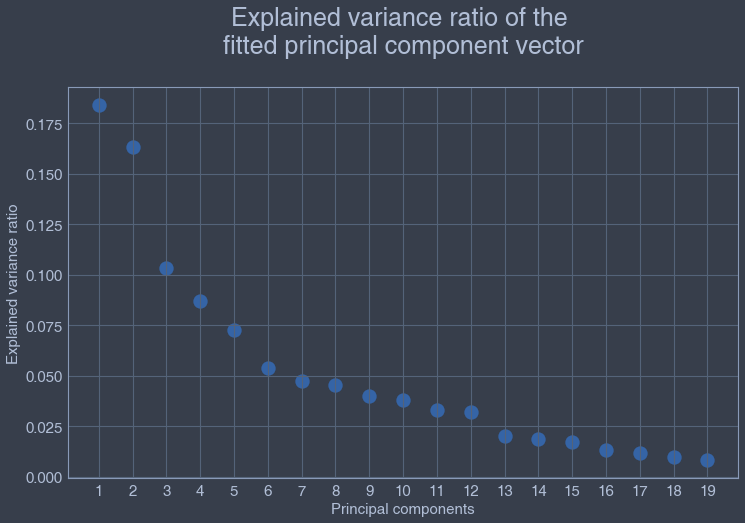

In [84]:
pca = PCA(n_components=None)
genres_pca = pca.fit(X.drop(['popularity', 'vote_count'], axis=1))

plt.scatter(x=[i+1 for i in range(len(genres_pca.explained_variance_ratio_))],
            y=genres_pca.explained_variance_ratio_,
            s=200, alpha=0.75, c='b')
plt.grid(True)
plt.title('Explained variance ratio of the \nfitted principal component vector\n', fontsize=25)
plt.xlabel('Principal components', fontsize=15)
plt.xticks([i+1 for i in range(len(genres_pca.explained_variance_ratio_))], fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Explained variance ratio', fontsize=15)

In [3]:
uk = pd.read_csv('data/unique_keywords_genres_count_with_labels_SHORTED_VERSION.csv', index_col=0)
uk.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,label
car crash,20,10,1,16,11,0,15,4,5,0,8,1,6,3,9,1,25,0,0,Thriller
liposuction,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,"Comedy, Drama, Fantasy"
stasis,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,Science Fiction
giant vegetable,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Animation
monster,48,43,22,41,0,0,17,27,50,0,71,1,12,0,55,8,29,1,0,Horror


Text(0, 0.5, 'Explained variance ratio')

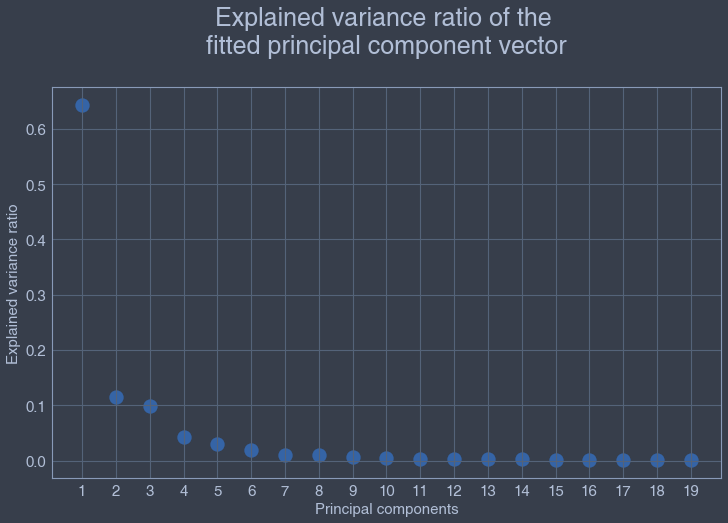

In [6]:
pca = PCA(n_components=None)
uk_pca = pca.fit(uk.drop(['label'], axis=1))

plt.scatter(x=[i+1 for i in range(len(uk_pca.explained_variance_ratio_))],
            y=uk_pca.explained_variance_ratio_,
            s=200, alpha=0.75, c='b')
plt.grid(True)
plt.title('Explained variance ratio of the \nfitted principal component vector\n', fontsize=25)
plt.xlabel('Principal components', fontsize=15)
plt.xticks([i+1 for i in range(len(uk_pca.explained_variance_ratio_))], fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Explained variance ratio', fontsize=15)